In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\\Users\\HP\\Python\\House Price"

C:\Users\HP\Python\House Price


In [3]:
housetrain=pd.read_csv('train (1).csv')

In [4]:
housetest=pd.read_csv('test (1).csv')

In [5]:
housetrain.shape

(1460, 81)

In [6]:
housetest.shape
# Test Data do not have Dependent Variable 'SalePrice', Predict it using
# Trained model

(1459, 80)

In [7]:
# Adding Dependent Varaible to Test Data with single value 'test' for 
# matching number of columns of train data & for Data subsetting in end
housetest['SalePrice']='test'

In [8]:
# Concatening Both Train & Test dataframes for preprocessing
combinedf=pd.concat([housetrain,housetest],axis=0)
# axis=0 Row wise Concatenation

In [9]:
combinedf.shape

(2919, 81)

In [10]:
# Split Dataframe into Numeric data & Non Numericdata
# Preprocessing is different for Object Data & Numeric Data, hence split
objectcols=combinedf.select_dtypes(include=['object'])
numericcols=combinedf.select_dtypes(include=np.number)

In [11]:
print(objectcols.shape)
print(numericcols.shape)
# Number of Object Columns is 44
# Number of Numeric Columns is 37

(2919, 44)
(2919, 37)


In [12]:
# Check Missing Values in Object Columns
objectcols.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Functional          2
Utilities           2
Electrical          1
KitchenQual         1
SaleType            1
Exterior2nd         1
Exterior1st         1
HeatingQC           0
Condition2          0
Street              0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
RoofStyle           0
BldgType            0
HouseStyle          0
Heating             0
RoofMatl            0
PavedDrive          0
ExterQual           0
ExterCond           0
Foundation          0
SaleCondition       0
CentralAir          0
SalePrice           0
dtype: int64

In [13]:
objectcols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       2915 non-null   object
 1   Street         2919 non-null   object
 2   Alley          198 non-null    object
 3   LotShape       2919 non-null   object
 4   LandContour    2919 non-null   object
 5   Utilities      2917 non-null   object
 6   LotConfig      2919 non-null   object
 7   LandSlope      2919 non-null   object
 8   Neighborhood   2919 non-null   object
 9   Condition1     2919 non-null   object
 10  Condition2     2919 non-null   object
 11  BldgType       2919 non-null   object
 12  HouseStyle     2919 non-null   object
 13  RoofStyle      2919 non-null   object
 14  RoofMatl       2919 non-null   object
 15  Exterior1st    2918 non-null   object
 16  Exterior2nd    2918 non-null   object
 17  MasVnrType     2895 non-null   object
 18  ExterQual      2919 non-null

In [14]:
# As per Data Dictionary, NA means the following:
# PoolQC - NA - No Pool
# MiscFeature - No MiscFeature
# Alley - NA  - No Alley Access
# Fence - NA  - No Fence
# FireplaceQu - NA - No Fireplace

In [15]:
# Imputing Missing Values with NotAvaialable using For Loop & Column list
notavail=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
for col in notavail:
    objectcols[col]=objectcols[col].fillna('NotAvailable')

<ipython-input-15-e95751feb6b4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objectcols[col]=objectcols[col].fillna('NotAvailable')


In [16]:
# As per Data Dictionary, NA means the following:
#GarageCond- No Garage       
#GarageQual- No Garage     
#GarageFinish - No Garage   
#GarageType - No Garage     

In [17]:
# Imputing Missing Values with NotAvaialable using For Loop & Column list
garagecols=['GarageCond','GarageQual','GarageFinish','GarageType']
for col in garagecols:
    objectcols[col]=objectcols[col].fillna('NotAvailable')

<ipython-input-17-1f6fe8e1cace>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objectcols[col]=objectcols[col].fillna('NotAvailable')


In [18]:
# As per Data Dictionary NA means the following:
#BsmtCond - No Basement
#BsmtExposure - No Basement
#BsmtQual -- No Basement
#BsmtFinType2 - No Basement
#BsmtFinType1 - No Basement

In [19]:
# Imputing Missing Values with NotAvaialable using For Loop & Column list
bsmtcols=['BsmtCond','BsmtExposure','BsmtQual','BsmtFinType2',
         'BsmtFinType1']
for col in bsmtcols:
    objectcols[col]=objectcols[col].fillna('NotAvailable')

<ipython-input-19-cb72843ab70c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objectcols[col]=objectcols[col].fillna('NotAvailable')


In [20]:
objectcols.MasVnrType.value_counts(dropna=False)

None       1742
BrkFace     879
Stone       249
BrkCmn       25
NaN          24
Name: MasVnrType, dtype: int64

In [21]:
# Imputing NA with Index of Maximum in Value Counts table
for col in objectcols:
    objectcols[col]=objectcols[col].fillna(
    objectcols[col].value_counts().idxmax())

<ipython-input-21-89b859a23d6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objectcols[col]=objectcols[col].fillna(


In [22]:
# Check Missing Values in Numeric Columns
numericcols.isnull().sum().sort_values(ascending=False)

LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
GarageArea         1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageCars         1
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
LowQualFinSF       0
LotArea            0
MSSubClass         0
1stFlrSF           0
2ndFlrSF           0
YrSold             0
GrLivArea          0
MoSold             0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
Id                 0
dtype: int64

In [23]:
# Check for both Mean & Median (50% or Q2)
numericcols.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [24]:
# Impute GarageYrBlt with missing code - 9999
numericcols.GarageYrBlt=numericcols.GarageYrBlt.fillna(9999)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [25]:
# Imputed all missing values in numeric columns with median of respective
#columns
for col in numericcols:
    numericcols[col]=numericcols[col].fillna(
    numericcols[col].median())

<ipython-input-25-59c856eff503>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericcols[col]=numericcols[col].fillna(


In [26]:
# Identify Categorical Columns from Numeric Columns. Columns like year,
# rating, etc.
numericcols.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [27]:
# Seperated Cateorical Columns from Numeric Columns
categorycols=numericcols[['OverallQual','OverallCond', 'YearBuilt', 
                          'YearRemodAdd','GarageYrBlt','MoSold', 
                          'YrSold']]

In [28]:
# Immediately dropped the above columns from numeric columns to prevent
# duplication
numericcols=numericcols.drop(['OverallQual','OverallCond', 'YearBuilt', 
                          'YearRemodAdd','GarageYrBlt','MoSold', 
                          'YrSold'],axis=1)

In [29]:
print(objectcols.shape)
print(numericcols.shape)
print(categorycols.shape)
# Number of Object Columns - 44
# Number of Numeric Columns - 30
# Number of Categorical Columns - 7

(2919, 44)
(2919, 30)
(2919, 7)


In [30]:
# Added SalePrice Column to Numerical Data which was in Object Data
numericcols['SalePrice']=objectcols.SalePrice

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le=LabelEncoder()

In [33]:
# Drop SalePrice Column from Objectcols as it is added to Numeric Cols
objectcols=objectcols.drop('SalePrice',axis=1)

In [34]:
# Label Encode or Dummy Varible Encoding of Object Cols
objectcolsdummy=objectcols.apply(le.fit_transform)

In [35]:
# Label Encode or Dummy Varible Encoding of Category Cols
categorycolsdummy=categorycols.apply(le.fit_transform)

In [36]:
# Concatinating all 3 dataframes - numericcols, objectcolsdummy & 
# categorycolsdummy into one Dataframe
combinedfclean=pd.concat([numericcols,objectcolsdummy,
                         categorycolsdummy],axis=1)

In [37]:
# Split data back to train & test from preprocessed combined dataframe
housetraindf=combinedfclean[combinedfclean.SalePrice!='test']
housetestdf=combinedfclean[combinedfclean.SalePrice=='test']

In [38]:
# Dropping SalePrice Column from test data
housetestdf=housetestdf.drop('SalePrice',axis=1)

In [39]:
# Converting SalePrice back to Numeric
housetraindf.SalePrice=housetraindf.SalePrice.astype('float64')

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [40]:
# Test Null Average SalePrice of different OverallCond is equal
housetraindf.SalePrice.groupby(housetraindf.OverallCond).mean()

OverallCond
0     61000.000000
1    141986.400000
2    101929.400000
3    120438.438596
4    203146.914738
5    153961.591270
6    158145.487805
7    155651.736111
8    216004.545455
Name: SalePrice, dtype: float64

In [41]:
cond0=housetraindf[housetraindf.OverallCond==0]
cond1=housetraindf[housetraindf.OverallCond==1]
cond2=housetraindf[housetraindf.OverallCond==2]
cond3=housetraindf[housetraindf.OverallCond==3]
cond4=housetraindf[housetraindf.OverallCond==4]
cond5=housetraindf[housetraindf.OverallCond==5]
cond6=housetraindf[housetraindf.OverallCond==6]
cond7=housetraindf[housetraindf.OverallCond==7]
cond8=housetraindf[housetraindf.OverallCond==8]

In [42]:
from scipy.stats import f_oneway

In [43]:
f_oneway(cond0.SalePrice,cond1.SalePrice,cond2.SalePrice,cond3.SalePrice,
        cond4.SalePrice,cond5.SalePrice,cond6.SalePrice,cond7.SalePrice,
        cond8.SalePrice)
# SINCE pvalue=7.962288819950615e-38 IS LESS THAN 0.05, REJECT NULL
# NULL - THERE IS NO SIGNFICANT DIFFERENCE IN AVERAGE SALEPRICE OF 
# DIFFERENT OVERALL CONDITION HOUSES

F_onewayResult(statistic=26.00317308892095, pvalue=7.962288819950615e-38)

In [44]:
# Test Null Average SalePrice of different MasVnrType is equal
housetraindf.SalePrice.groupby(housetraindf.MasVnrType).mean()

MasVnrType
0    146318.066667
1    204691.871910
2    156958.243119
3    265583.625000
Name: SalePrice, dtype: float64

In [45]:
type0=housetraindf[housetraindf.MasVnrType==0]
type1=housetraindf[housetraindf.MasVnrType==1]
type2=housetraindf[housetraindf.MasVnrType==2]
type3=housetraindf[housetraindf.MasVnrType==3]

In [46]:
f_oneway(type0.SalePrice,type1.SalePrice,type2.SalePrice,type3.SalePrice)
# SINCE pvalue=1.2797035312662622e-63 IS LESS THAN 0.05, REJECT NULL
# NULL - THERE IS NO SIGNFICANT DIFFERENCE IN AVERAGE SALEPRICE OF DIFFERENT OVERALL CONDITION HOUSES

F_onewayResult(statistic=108.9113045588765, pvalue=1.2797035312662622e-63)

In [47]:
pd.crosstab(housetraindf.OverallCond,housetraindf.OverallQual)

OverallQual,0,1,2,3,4,5,6,7,8,9
OverallCond,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0
1,0,0,2,1,1,0,0,0,1,0
2,1,2,3,5,7,6,1,0,0,0
3,0,0,6,20,21,6,3,1,0,0
4,0,1,2,44,142,180,247,148,42,15
5,0,0,5,24,104,83,28,7,0,1
6,0,0,1,19,89,66,23,7,0,0
7,0,0,1,2,29,30,8,2,0,0
8,0,0,0,1,4,3,9,3,0,2


In [48]:
from scipy.stats import chi2_contingency

In [49]:
chi2_contingency(pd.crosstab(housetraindf.OverallCond,housetraindf.OverallQual))
# Since p-value= 4.3223202616191885e-229 is less than 0.05, Reject null

(1322.0585284633244,
 4.3223202616191885e-229,
 72,
 array([[1.36986301e-03, 2.05479452e-03, 1.36986301e-02, 7.94520548e-02,
         2.71917808e-01, 2.56164384e-01, 2.18493151e-01, 1.15068493e-01,
         2.94520548e-02, 1.23287671e-02],
        [6.84931507e-03, 1.02739726e-02, 6.84931507e-02, 3.97260274e-01,
         1.35958904e+00, 1.28082192e+00, 1.09246575e+00, 5.75342466e-01,
         1.47260274e-01, 6.16438356e-02],
        [3.42465753e-02, 5.13698630e-02, 3.42465753e-01, 1.98630137e+00,
         6.79794521e+00, 6.40410959e+00, 5.46232877e+00, 2.87671233e+00,
         7.36301370e-01, 3.08219178e-01],
        [7.80821918e-02, 1.17123288e-01, 7.80821918e-01, 4.52876712e+00,
         1.54993151e+01, 1.46013699e+01, 1.24541096e+01, 6.55890411e+00,
         1.67876712e+00, 7.02739726e-01],
        [1.12465753e+00, 1.68698630e+00, 1.12465753e+01, 6.52301370e+01,
         2.23244521e+02, 2.10310959e+02, 1.79382877e+02, 9.44712329e+01,
         2.41801370e+01, 1.01219178e+01],
        

In [50]:
pd.crosstab(housetraindf.OverallCond,housetraindf.MasVnrType)

MasVnrType,0,1,2,3
OverallCond,,,,
0,0,0,1,0
1,0,0,4,1
2,1,3,21,0
3,2,10,44,1
4,6,305,396,114
5,2,67,177,6
6,4,43,153,5
7,0,11,61,0
8,0,6,15,1


In [51]:
chi2_contingency(pd.crosstab(housetraindf.OverallCond,housetraindf.MasVnrType))
# Since p-value= 3.3881697799651887e-19 is less than 0.05, Reject null

(144.5478052360173,
 3.3881697799651887e-19,
 24,
 array([[1.02739726e-02, 3.04794521e-01, 5.97260274e-01, 8.76712329e-02],
        [5.13698630e-02, 1.52397260e+00, 2.98630137e+00, 4.38356164e-01],
        [2.56849315e-01, 7.61986301e+00, 1.49315068e+01, 2.19178082e+00],
        [5.85616438e-01, 1.73732877e+01, 3.40438356e+01, 4.99726027e+00],
        [8.43493151e+00, 2.50236301e+02, 4.90350685e+02, 7.19780822e+01],
        [2.58904110e+00, 7.68082192e+01, 1.50509589e+02, 2.20931507e+01],
        [2.10616438e+00, 6.24828767e+01, 1.22438356e+02, 1.79726027e+01],
        [7.39726027e-01, 2.19452055e+01, 4.30027397e+01, 6.31232877e+00],
        [2.26027397e-01, 6.70547945e+00, 1.31397260e+01, 1.92876712e+00]]))

In [52]:
# Split Data into DependentVariable(y) & Independent Variables (Xs)
y=housetraindf.SalePrice
X=housetraindf.drop(['SalePrice','Id'],axis=1)

In [53]:
housetestdf=housetestdf.drop('Id',axis=1)

<AxesSubplot:>

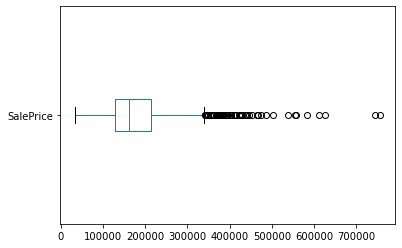

In [54]:
# Check Distrbution and Outliers of SalePrice
y.plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

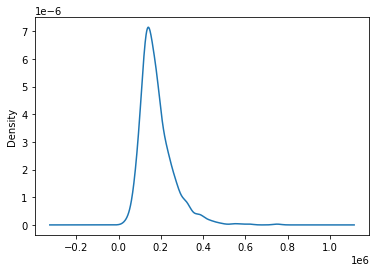

In [55]:
y.plot(kind='density')

<AxesSubplot:ylabel='Frequency'>

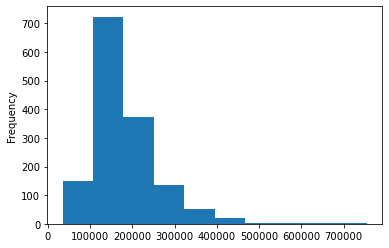

In [56]:
y.plot(kind='hist')

In [57]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [58]:
linreg=LinearRegression()

In [59]:
linregmodel=linreg.fit(X,y)

In [60]:
linregmodel.score(X,y) # R Square

0.853106728035443

In [61]:
regpredict=linregmodel.predict(housetestdf)

In [62]:
pd.DataFrame(regpredict).to_csv('reg.csv')

In [63]:
# Kaggle Score - 0.35729

In [64]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [65]:
tree=DecisionTreeRegressor()

In [66]:
treemodel=tree.fit(X,y)

In [67]:
treemodel.score(X,y)

1.0

In [68]:
treepredict=treemodel.predict(housetestdf)

In [69]:
pd.DataFrame(treepredict).to_csv('tree.csv')

In [70]:
# Kaggle Score - 0.20490

In [71]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [72]:
RF=RandomForestRegressor(n_estimators=3000)

In [73]:
RFmodel=RF.fit(X,y)

In [74]:
RFmodel.score(X,y)

0.9820222773512035

In [75]:
Rfpredict=RFmodel.predict(housetestdf)

In [76]:
pd.DataFrame(Rfpredict).to_csv('RF.csv')

In [77]:
# Kaggle Score - 0.14574

In [78]:
# Gradient Boost ingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [79]:
gbm=GradientBoostingRegressor(n_estimators=2000)

In [80]:
gbmmodel=gbm.fit(X,y)

In [81]:
gbmmodel.score(X,y)

0.9997657179234075

In [82]:
gbmpredict=gbmmodel.predict(housetestdf)

In [83]:
pd.DataFrame(gbmpredict).to_csv('gbm.csv')

In [84]:
# Kaggle Score - 0.13647

In [85]:
# Lasso, Ridge, ElasticNet
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [86]:
lasso=Lasso(max_iter=7000)

In [87]:
lassomodel=lasso.fit(X,y)

In [88]:
lassomodel.score(X,y)

0.8531063330827384

In [89]:
lassopredict=lassomodel.predict(housetestdf)

In [90]:
pd.DataFrame(lassopredict).to_csv('lasso.csv')

In [91]:
# Kaggle Score - 0.35713

In [92]:
ridge=Ridge()

In [93]:
ridgemodel=ridge.fit(X,y)

In [94]:
ridgemodel.score(X,y)

0.8528963294087695

In [95]:
ridgepredict=ridgemodel.predict(housetestdf)

In [96]:
pd.DataFrame(ridgepredict).to_csv('ridge.csv')

In [97]:
# Kaggle Score - 0.18068

In [98]:
en=ElasticNet()

In [99]:
enmodel=en.fit(X,y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 812216712069.015, tolerance: 920791133.4609977
  model = cd_fast.enet_coordinate_descent(


In [100]:
enmodel.score(X,y)

0.8352802823323568

In [101]:
enpredict=enmodel.predict(housetestdf)

In [102]:
pd.DataFrame(enpredict).to_csv('elasticnet.csv')

In [103]:
# Kaggle Score - 0.15455